# NOTE
The material in this notebook is strongly influenced by a linear algebra tutorial by Aurelien Geron that can be found here:

https://github.com/ageron/handson-ml/blob/master/math_linear_algebra.ipynb

# Table of Contents
- [Vectors with Python](#Vectors-with-Python)
 - [Visualizing Vectors](#Visualizing-Vectors)
 - [Adding Vectors Visualized](#Adding-Vectors-Visualized)
 - [Rigid Euclidean Geometric Transformations](#Rigid-Euclidean-Geometric-Transformations)
   - [Vector Translation](#Vector-Translation)
 - [Zero Vector](#Zero-Vector)
 - [Vector Multiplication](#Vector-Multiplication)
   - [Scalar Vector Multiplication](#Scalar-Vector-Multiplication)
     - [The Normalized Vector](#The-Normalized-Vector)
   - [Dot Product](#Dot-Product)
     - [Angles Between Any Two Vectors](#Angles-Between-Any-Two-Vectors)
     - [Vector Projections](#Vector-Projections)
   - [Cross Product](#Cross-Product)
     - [Scalar Triple Product](#Scalar-Triple-Product)
- [A Search for Better Plots](#A-Search-for-Better-Plots)

# Vectors with Python
First, NumPy and Matplotlib need to be imported. Matplotlib needs to be made inline for the notebook, and seaborn needs to be imported to make the plots look prettier.

Note that the 3D toolkit of Matplotlib is being imported.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import itertools
import numpy as np
import numpy.linalg as la

Next, the style is set to white-grid (personal preference), and the context is set to talk to make viewing the charts easier (bigger numbers and plots).

In [2]:
sns.set(style='whitegrid', palette='muted', font='roboto')
sns.set_context('talk')

Now the vectors to be visualized need to be created. They will be stored as NumPy _ndarray_ objects. Some 2D and 3D (or $\rm I\!R^2$ and $\rm I\!R^3$ - 2 and 3 dimensional real space, or the set of all possible 2 and 3 real-valued tuples) will be used.

A couple vectors from $\rm I\!R^1$ will also be created for the simplest case.

In [3]:
u,v = np.array([6,0]), np.array([3,1])
u3,v3 = np.array([6,0,4]), np.array([3,5,6])
u1,v1 = np.array([6]), np.array([3])
print(u)
print(v)
print(u3)
print(v3)
print(u1)
print(v1)

[6 0]
[3 1]
[6 0 4]
[3 5 6]
[6]
[3]


## Visualizing Vectors
The two functions below are only used for vector plots in $\rm I\!R^1$. The results of the plots in $\rm I\!R^1$ are shown in the following cell.

In [4]:
def plot_1d_vector(vector, origin=0, **kwargs):
    if len(vector) == 0: return
    v = vector[0]
    return plt.arrow(origin, 0, vector[0], 0,
                     length_includes_head=True,
                     width=0.1, **kwargs)

def get_1d_axis(*vectors):
    min_x = min(min(vectors), 0) - 2
    max_x = max(max(vectors), 0) + 2
    plt.plot([min_x,max_x], [0,0], color='0.8')
    return plt.axis([min_x, max_x,
                     -1, 1])

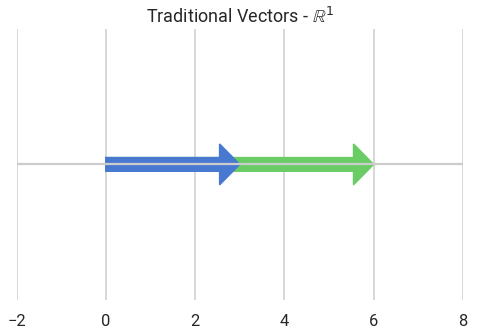

In [5]:
figure = plt.figure(figsize=(8,5))
get_1d_axis(u1,v1)
plot_1d_vector(u1, color='g')
plot_1d_vector(v1, color='b')
sns.despine(left=True, bottom=True, right=True, top=True)
plt.gca().yaxis.set_visible(False)
plt.title('Traditional Vectors - $\mathbb{R}^1$')
plt.show()

The functions below create the axes for the $\rm I\!R^2$ and $\rm I\!R^3$ vector plots. They are really just to ensure the vectors can be seen completely when plotted. The z-axis must be obtained separately for $\rm I\!R^3$ vector plots.

In [6]:
def get_xy_axes(*vectors):
    """Get appropriate x and y axes for vectors."""
    if len(vectors) == 0:
        return
    if vectors[0].size == 2:
        return get_2d_xy_axes(*vectors)
    elif vectors[0].size == 3:
        return get_3d_xy_axes(*vectors)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        

def get_z_axis(axes, *vectors):
    """Get appropriate z axis for R3 vector."""
    x,y,z = zip(*vectors)
    min_z = min(min(z), 0)
    max_z = max(max(z), 0) + 2
    return axes.set_zlim(min_z, max_z)

        
def get_2d_xy_axes(*vectors):
    x,y = zip(*vectors)
    min_x = min(min(x)-1, 0)
    min_y = min(min(y)-1, 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     min_y, max_y])

def get_3d_xy_axes(*vectors):
    x,y,z = zip(*vectors)
    min_x = min(min(x), 0)
    min_y = min(min(y), 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     max_y, min_y])

The functions below actually plot the $\rm I\!R^2$ and $\rm I\!R^3$ vectors. They can either be plotted as single points in n-dimensional space or arrow representations in n-dimensional space.

In [7]:
plot_types = ['arrow',
              'scatter',
              None]

def plot_vector(vector, origin=[0,0,0], plot_type=plot_types[0],
                axes=None, display_norm=False, **kwargs):
    """Plots vectors in R2 and R3.
    
    Returns plt if plotting in R2.
    Returns Axes3D if plotting in R3.
    
    If plotting multiple vectors in R3,
    pass in the returned axes from the
    first plot for subsequent plots.
    """
    
    if vector.size == 2:
        return plot_2d_vector(vector, origin, plot_type,
                              display_norm, **kwargs)
    elif vector.size == 3:
        return plot_3d_vector(vector, origin, plot_type, axes,
                              display_norm, **kwargs)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        
        
def plot_2d_vector(vector, origin, plot_type,
                   display_norm, **kwargs):
    if plot_type == plot_types[0]:
        plt.arrow(origin[0], origin[1],
                  vector[0], vector[1],
                  length_includes_head=True,
                  head_width=0.2, head_length=0.3,
                  **kwargs)
        if display_norm:
            bbox = dict(boxstyle='round', fc='0.95')
            plt.annotate(f'norm: {la.norm(vector):.2f}',
                         [vector[0]-1, vector[1]+0.5],
                         fontname='roboto',
                         bbox=bbox)
    elif plot_type == plot_types[1]:
        x,y = zip(vector)
        plt.scatter(x, y, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return plt

def plot_3d_vector(vector, origin, plot_type, axes,
                   display_norm, **kwargs):
    if axes == None:
        fig = plt.figure(figsize=(10,7))
        ax3 = fig.add_subplot(111, projection='3d')
    else:
        ax3 = axes
        
    x,y,z = vector
    ox,oy,oz = origin
    ax3.invert_xaxis()
    
    ax3.plot([ox+x,ox+x], [oy+y,oy+y], [oz,oz+z], linestyle=':')
    ax3.plot([ox+x,ox+x], [oy,oy+y], [oz+z,oz+z], linestyle=':')
    ax3.plot([ox,ox+x], [oy+y,oy+y], [oz+z,oz+z], linestyle=':')
    
    if plot_type == plot_types[0]:
        ax3.quiver(*origin,x,y,z,
                   linewidth=2,
                   **kwargs)
        if display_norm:
            bbox = dict(boxstyle='round', fc='0.95')
            ax3.text(origin[0]+vector[0]-1,
                     origin[1]+vector[1]+0.25,
                     origin[2]+vector[2]+1,
                     f'norm: {la.norm(vector):.2f}',
                     fontname='roboto',
                     bbox=bbox)
    elif plot_type == plot_types[1]:
        ax3.scatter(origin[0]+x,
                    origin[1]+y,
                    origin[2]+z,
                    **kwargs)
    else:
        print('Desired plot not supported.')
        
    return ax3

Now it's time to show the interesting plots. The vectors of $\rm I\!R^2$ are plotted below.

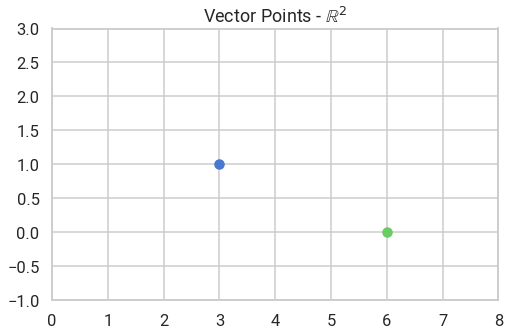

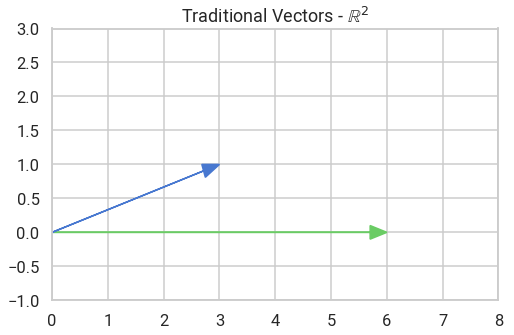

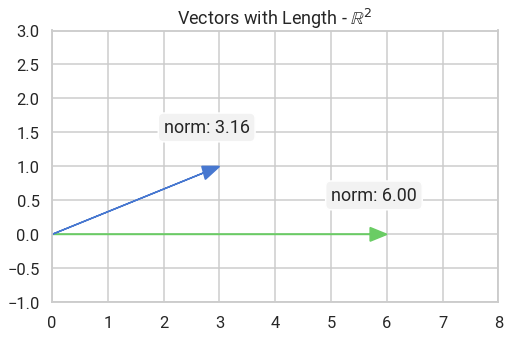

In [8]:
figure = plt.figure(figsize=(8,5))
plt.title('Vector Points - $\mathbb{R}^2$')
plot_vector(u, plot_type='scatter', color='g')
plot_vector(v, plot_type='scatter', color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plt.title('Traditional Vectors - $\mathbb{R}^2$')
plot_vector(u, color='g')
plot_vector(v, color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plt.title('Vectors with Length - $\mathbb{R}^2$')
plot_vector(u, display_norm=True, color='g')
plot_vector(v, display_norm=True, color='b')
get_xy_axes(u,v)

plt.show()

A diagram that proves the norm function from NumPy works (it returns the length of vectors) is shown below.

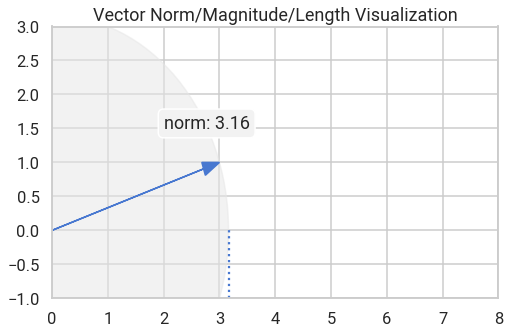

In [9]:
figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(plt.Circle((0,0), la.norm(v), color='0.9', alpha=0.5))
plt.plot(*(zip([la.norm(v),-1],[la.norm(v),0])), ':')
plot_vector(v, display_norm=True, color='b')
get_xy_axes(u,v)

plt.title('Vector Norm/Magnitude/Length Visualization')
plt.show()

Using the formula for the magnitude (or norm or length) of a vector can prove the norm function from NumPy works, too. The function is $\|v\| = \sqrt{\sum_iv_i^2}$.

In [10]:
example_vector = np.array([3,5,4])
print(f'{sum(x**2 for x in example_vector)**0.5} == {la.norm(example_vector)}')

7.0710678118654755 == 7.0710678118654755


The vectors of $\rm I\!R^3$ are plotted below. The 3D plots use dashed lines to give the illusion of depth.

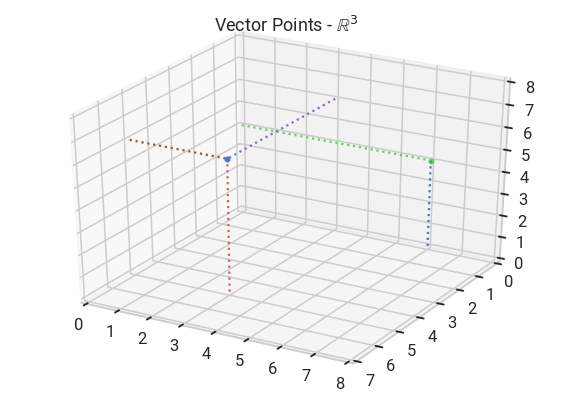

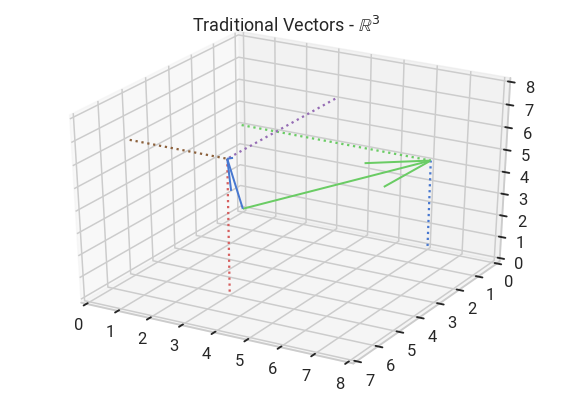

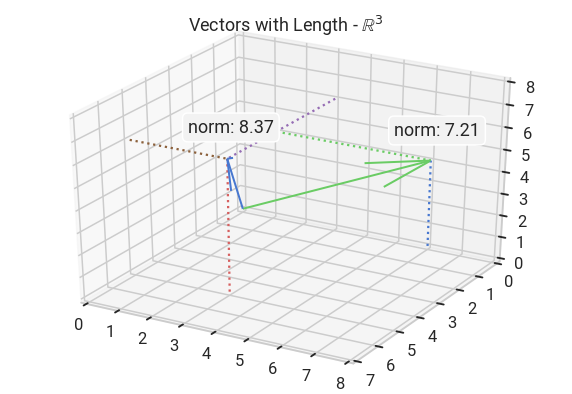

In [11]:
ax3 = plot_vector(u3, plot_type='scatter', color='g')
plot_vector(v3, plot_type='scatter', axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Vector Points - $\mathbb{R}^3$')

ax3 = plot_vector(u3, color='g')
plot_vector(v3, axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Traditional Vectors - $\mathbb{R}^3$')

ax3 = plot_vector(u3, display_norm=True, color='g')
plot_vector(v3, axes=ax3, display_norm=True, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Vectors with Length - $\mathbb{R}^3$')

plt.show()

## Adding Vectors Visualized
Any vectors belonging to the same set of valued-tuples can be added together. It is achieved by adding each vector component to its corresponding component in the other vectors. As shown below, it is commutative and associative.

In [12]:
w = np.array([3,5])
w3 = np.array([3,5,1])

print('Commutative:')
print(f'{u} + {v} = {u+v}')
print(f'{v} + {u} = {v+u}')

print('\nAssociative:')
print(f'{u} + ({v} + {w}) = {u + (v + w)})')
print(f'({u} + {v}) + {w} = {(u + v) + w})')

print('\nArbitrarily sized:')
large_u, large_v = np.array([3,5,2,6,7,3,9]), np.array([8,5,4,9,7,5,0])
print(f'{large_u} + {large_v} = {large_u + large_v}')

print('\nMust belong to the same set of valued tuples:')
try:
    print(f'{u} + {u3} =')
    u+u3
except Exception as e:
    print(e)

Commutative:
[6 0] + [3 1] = [9 1]
[3 1] + [6 0] = [9 1]

Associative:
[6 0] + ([3 1] + [3 5]) = [12  6])
([6 0] + [3 1]) + [3 5] = [12  6])

Arbitrarily sized:
[3 5 2 6 7 3 9] + [8 5 4 9 7 5 0] = [11 10  6 15 14  8  9]

Must belong to the same set of valued tuples:
[6 0] + [6 0 4] =
operands could not be broadcast together with shapes (2,) (3,) 


The plot below shows what happens when vectors are added together.

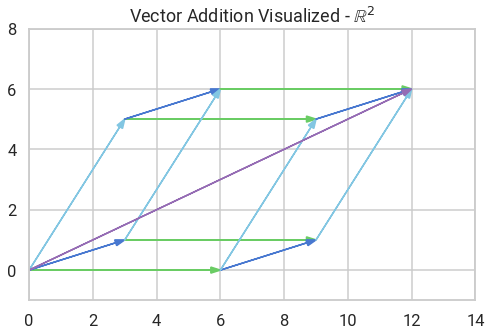

In [13]:
figure = plt.figure(figsize=(8,5))
plot_vector(u, color='g')
plot_vector(v, color='b')
plot_vector(w, color='c')
plot_vector(u, origin=v, color='g')
plot_vector(u, origin=w, color='g')
plot_vector(v, origin=u, color='b')
plot_vector(v, origin=w, color='b')
plot_vector(w, origin=u, color='c')
plot_vector(w, origin=v, color='c')
plot_vector(u, origin=v+w, color='g')
plot_vector(v, origin=u+w, color='b')
plot_vector(w, origin=u+v, color='c')
plot_vector(u+v+w, color='m')
get_xy_axes(u,v,w,u+v+w)
plt.title('Vector Addition Visualized - $\mathbb{R}^2$')
plt.show()

As should be expected, it even works in $\rm I\!R^3$, as well as all other dimensions.

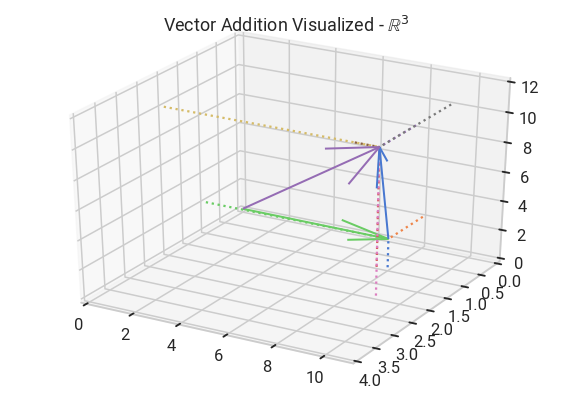

In [14]:
a,b = np.array([8,1,2]), np.array([1,1,8])
c = a + b
ax3 = plot_vector(a, color='g')
plot_vector(b, origin=a, axes=ax3, color='b')
plot_vector(c, axes=ax3, color='m')
get_z_axis(ax3, a, b, c)
get_xy_axes(a,b,c)
plt.title('Vector Addition Visualized - $\mathbb{R}^3$')
plt.show()

The plot below further demonstrates that the principles of vector addition demonstrated this far apply to any arbitrary number of vectors

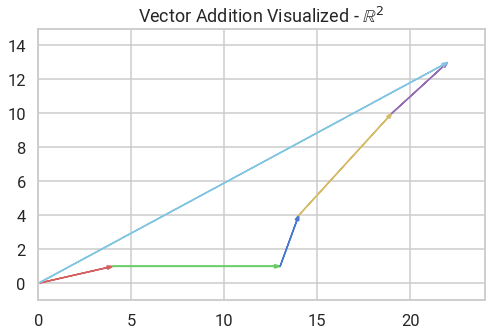

In [15]:
a,b,c,d,e = (np.array([4,1]), np.array([9,0]), np.array([1,3]),
             np.array([5,6]), np.array([3,3]))
f = a + b + c + d + e

figure = plt.figure(figsize=(8,5))
plot_vector(a, color='r')
plot_vector(b, origin=a, color='g')
plot_vector(c, origin=a+b, color='b')
plot_vector(d, origin=a+b+c, color='y')
plot_vector(e, origin=a+b+c+d, color='m')
plot_vector(f, color='c')
get_xy_axes(a,b,c,d,e,f)
plt.title('Vector Addition Visualized - $\mathbb{R}^2$')
plt.show()

## Rigid Euclidean Geometric Transformations
In Euclidean geometry, the rigid geometric transformations include Translations, Rotations, Reflections, and Glide Reflections. Because matrices have yet to be introduced, the only geometric transformation that will be shown at this point is the translation. This is mainly because the other transformations, while they can be applied to vector shapes, are very easy to implement through matrices.

### Vector Translation
Translations occur when every point in a geometric space are moved the same amount in a single direction. This can be achieved in $\rm I\!R^2$ by adding a vector to each point in a given geometric space, as shown below.

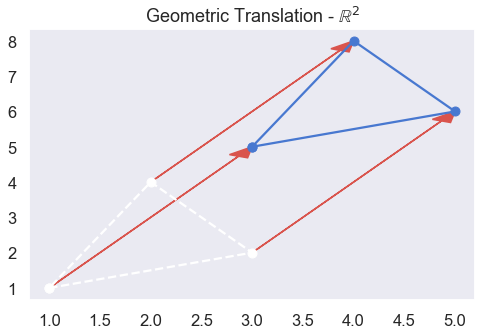

In [16]:
sns.set_style('dark')

a,b,c = np.array([1,1]), np.array([3,2]), np.array([2,4])
v_translation = np.array([2,4])

figure = plt.figure(figsize=(8,5))
plt.plot(*zip(a,b,c,a), 'w--', *zip(a,b,c,a), 'wo')

color = sns.xkcd_rgb['pale red']
plot_vector(v_translation, origin=a, color=color)
plot_vector(v_translation, origin=b, color=color)
plot_vector(v_translation, origin=c, color=color)

ta,tb,tc = (a,b,c)+v_translation
plt.plot(*zip(ta,tb,tc,ta), 'b-', *zip(ta,tb,tc,ta), 'bo')

plt.title('Geometric Translation - $\mathbb{R}^2$')
plt.show()

## Zero Vector
Every set of n-valued tuples has a zero vector, which is just a vector of n zeros. NumPy gives a simple function to return a zero vector of any dimension.

In [17]:
np.zeros(2), np.zeros(3), np.zeros(10)

(array([0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## Vector Multiplication
There a many different methods of multiplication when it comes to vectors, including multiplication by scalar, dot product, and cross product.

### Scalar Vector Multiplication
Multiplying a vector belonging to $\rm I\!R^n$ (n-dimensional space) by a scalar (just a number) results in a scaled-up version of the vector belonging to the same linear span as the original vector. As shown below, it is commutative, associative, and distributive.

In [18]:
scalar = 2
vector = np.array([2,1])

print('Vector of any size:')
n_vector = np.array([3,2,5,6,7,1,2,9,0,0,2])
print(f'{scalar} * {n_vector} = {scalar * n_vector}')

print('\nCommutative:')
print(f'{scalar} * {vector} = {scalar * vector}')
print(f'{vector} * {scalar} = {vector * scalar}')

print('\nAssociative:')
print(f'{scalar} * ({scalar} * {vector}) = {scalar * (scalar * vector)}')
print(f'({scalar} * {scalar}) * {vector} = {(scalar * scalar) * vector}')

print('\nDistributive:')
print(f'{scalar} * ({u3} + {v3}) = {scalar * (u3 + v3)}')
print(f'({scalar} * {u3}) + ({scalar} * {v3}) = {(scalar * u3) + (scalar * v3)}')

Vector of any size:
2 * [3 2 5 6 7 1 2 9 0 0 2] = [ 6  4 10 12 14  2  4 18  0  0  4]

Commutative:
2 * [2 1] = [4 2]
[2 1] * 2 = [4 2]

Associative:
2 * (2 * [2 1]) = [8 4]
(2 * 2) * [2 1] = [8 4]

Distributive:
2 * ([6 0 4] + [3 5 6]) = [18 10 20]
(2 * [6 0 4]) + (2 * [3 5 6]) = [18 10 20]


It is graphically visualized below.

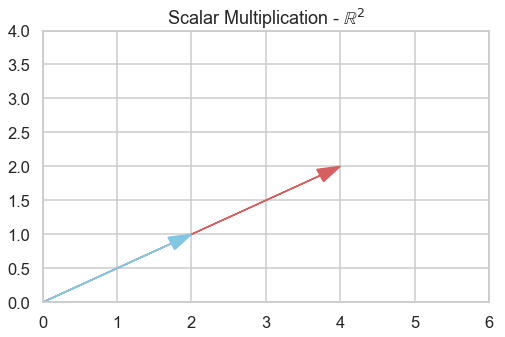

In [19]:
sns.set_style('whitegrid')

figure = plt.figure(figsize=(8,5))
plot_vector(scalar*vector, color='r')
plot_vector(vector, color='c')
get_xy_axes(vector, scalar*vector)
plt.title('Scalar Multiplication - $\mathbb{R}^2$')
plt.show()

It can be further visualized by showing that a shape composed of vector points is scaled-up when all vectors are multiplied by the same scalar.

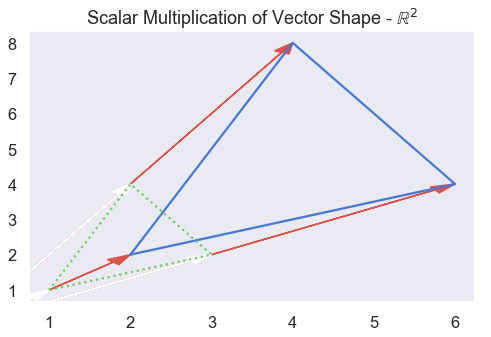

In [20]:
sns.set_style('dark')
figure = plt.figure(figsize=(8,5))

color = sns.xkcd_rgb['pale red']
sa,sb,sc = scalar*a, scalar*b, scalar*c
plt.plot(*zip(sa,sb,sc,sa), 'b-')
plot_vector(sa, color=color)
plot_vector(sb, color=color)
plot_vector(sc, color=color)

plt.plot(*zip(a,b,c,a), 'g:')
plot_vector(a, color='w')
plot_vector(b, color='w')
plot_vector(c, color='w')

plt.title('Scalar Multiplication of Vector Shape - $\mathbb{R}^2$')
plt.show()

#### The Normalized Vector
Using scalar multiplication, the normalized vector of any vector __v__ can be obtained.
This is a unit vector (length of 1) that points in the same direction as **v**. They are obtained by multiplying a vector by a scalar equal to the reciprocal of its length. In other words, if a vector is divided by its length (also magnitude or norm), the result is the vector in its normalized form.

Unit vectors and normalized vectors are noted with a hat, so the normalized vector for __v__ would be **$\hat v$**.

An example is plotted below.

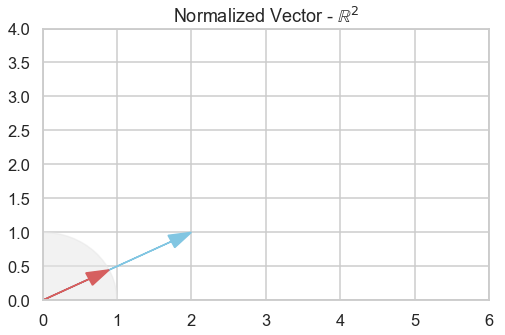

In [21]:
sns.set_style('whitegrid')

figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(plt.Circle((0,0), 1, color='0.9', alpha=0.5))
plot_vector(vector, color='c')
plot_vector(vector / la.norm(vector), color='r')
get_xy_axes(vector, scalar*vector)
plt.title('Normalized Vector - $\mathbb{R}^2$')
plt.show()

Note that it works for any dimension.

In [22]:
v8 = np.array([3,6,0,1,7,3,0,22])
v8_norm = v8 / la.norm(v8)
print(f'Length of v8_norm is: {la.norm(v8_norm)}')

Length of v8_norm is: 1.0


### Dot Product
The next form of vector multiplication is the dot product (or scalar product or inner product or projection product). It is obtained by multiplying each element of one vector by the corresponding element in another vector and summing the results of those multiplications. It results in a scalar (hence 'scalar product') and is noted by $u\cdot v$ (hence 'dot product').

NumPy offers two functions for it, as well as a use for the infix operator in Python, which is proven to work as expected below.

In [23]:
print(f'{sum(ui*vi for ui,vi in zip(u3,v3))} == {np.dot(u3,v3)} == {u3.dot(v3)}')
print(f'{u3.dot(v3)} == {u3 @ v3} != {u3*v3}')

42 == 42 == 42
42 == 42 != [18  0 24]


The snippets below demonstrates the properties of the dot product.

In [24]:
print('Commutative:')
print(f'{u} DOT {v} = {u @ v}')
print(f'{v} DOT {u} = {v @ u}')

print('\nNot Associative or Distributive:')
try:
    print(f'{u} DOT {v} DOT {w} =')
    u @ v @ w
except Exception as e:
    print(e)
    print('Distributivity is also not possible for the same reason.')
    
print('\nAssociative for Scalar Multiplication:')
print(f'{scalar} * ({u} DOT {v}) = {scalar * (u @ v)}')
print(f'({scalar} * {u}) DOT {v} = {(scalar * u) @ v}')

print('\nDistributive for Vector Addition')
print(f'{u} DOT ({v} + {w}) = {u @ (v + w)}')
print(f'({u} DOT {v}) + ({u} DOT {w}) = {u @ v + u @ w}')

Commutative:
[6 0] DOT [3 1] = 18
[3 1] DOT [6 0] = 18

Not Associative or Distributive:
[6 0] DOT [3 1] DOT [3 5] =
Scalar operands are not allowed, use '*' instead
Distributivity is also not possible for the same reason.

Associative for Scalar Multiplication:
2 * ([6 0] DOT [3 1]) = 36
(2 * [6 0]) DOT [3 1] = 36

Distributive for Vector Addition
[6 0] DOT ([3 1] + [3 5]) = 36
([6 0] DOT [3 1]) + ([6 0] DOT [3 5]) = 36


#### Angles Between Any Two Vectors
The dot product is also equal to the cosine of the angle between the two vectors multiplied by both their lengths. This means the angle between them can be found by taking the arccosine (inverse cosine) of the dot product of the two vectors divided by the product of their lengths.

In [25]:
angle = np.arccos(np.clip(u @ v / (la.norm(u) * la.norm(v)), -1, 1))
print(f'angle between u and v = {angle * 180 / np.pi} degrees')

print(f'{u} DOT {v} = {u @ v}')
print(f'cos(angle_between)*||u||*||v|| = {np.cos(angle)*la.norm(u)*la.norm(v)}')

angle between u and v = 18.434948822922017 degrees
[6 0] DOT [3 1] = 18
cos(angle_between)*||u||*||v|| = 18.0


When the dot product between two vectors equals 0, this means the vectors are orthogonal. Orthogonal, not perpendicular, is used because the zero vector could be used in or could be the result of a dot product calculation. Perpendicular implies 90 degrees, while orthogonal implies 90 degrees or the zero vector, which is orthogonal to all other vectors including itself.

In [26]:
x_only = np.array([3,0])
y_only = np.array([0,2])
x_only @ y_only

0

The dot product is very powerful because it can be applied to vectors of any dimension. This means the angle between any two vectors in any dimension can be found.

In [27]:
print(large_u)
print(large_v)
print(large_u @ large_v)

[3 5 2 6 7 3 9]
[8 5 4 9 7 5 0]
175


#### Vector Projections
The other name for a dot product that hasn't been justified is the projection product. This name exists because the dot product can be used to find the projection of one vector on another vector. In other words, the projection of one vector on another vector is the component of that vector in the direction of the other vector. In even more words, the projection of one vector on another vector is the orthogonal projection of that vector parallel to the other vector.

For any two vectors <b>u</b> and <b>v</b>, the projection of **v** on __u__ is $(v\cdot \hat u)\times\hat u$.

In [28]:
proj = v.dot(u / la.norm(u))*(u / la.norm(u))
print(f'projection of v onto u: {proj}')

projection of v onto u: [3. 0.]


It can be visualized via the plot below.

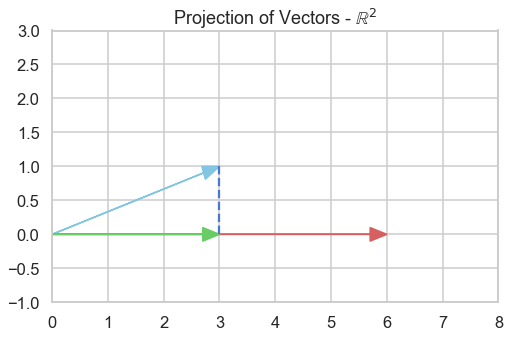

In [29]:
figure = plt.figure(figsize=(8,5))
plot_vector(u, color='r')
plot_vector(v, color='c')
plot_vector(v.dot(u / la.norm(u))*(u / la.norm(u)), color='g')
plt.plot(*zip(v,proj), '--')
get_xy_axes(u,v)
plt.title('Projection of Vectors - $\mathbb{R}^2$')
plt.show()

The formula above makes logical sense. Orthogonal vectors have a dot product of 0, while vectors in the same direction have a dot product equal to the product of their lengths; therefore, the dot product of a vector with a normalized vector (length 1) results in the length of that vector in the direction of the normalized vector (if they were in the same direction, it would be the length of that vector). Multiplying this scalar by the normalized vector scales the unit vector to the length of the like-direction vector.

### Cross Product
The last method of vector multiplication covered in this notebook is the cross product (or vector product or directed area product). It only applies to vectors in $\rm I\!R^3$, and it results in a third vector, also in $\rm I\!R^3$, that is orthogonal to both vectors on which the operation was performed. For two vectors <b>u</b> and <b>v</b>, it is represented by $u\times v$.

In [30]:
cross = np.cross(u3,v3)
print('cross product:', cross)
print(cross.dot(u3))
print(cross.dot(v3))

cross product: [-20 -24  30]
0
0


The names vector product and cross product are easy to understand (results in a vector and denoted by a cross symbol for multiplication, respectively). The name directed area product is a little more complex. The vector that results from the cross product of two vectors is, in addition to being orthogonal to both vectors, a vector of length equal to the area of the parallelogram with sides defined by both vectors.

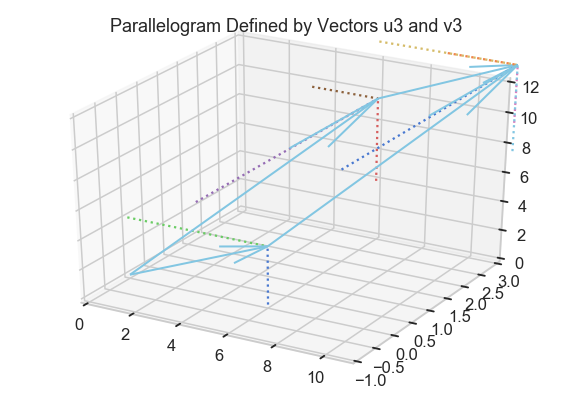

In [31]:
ax3 = plot_vector(u3, color='c')
plot_vector(v3, axes=ax3, color='c')
plot_vector(u3, axes=ax3, origin=v3, color='c')
plot_vector(v3, axes=ax3, origin=u3, color='c')
get_xy_axes(u,v,u+v)
get_z_axis(ax3, u3, v3, u3+v3)
plt.title('Parallelogram Defined by Vectors u3 and v3')
plt.show()

In [32]:
angle = np.arccos(np.clip(u3.dot(v3) / (la.norm(u3) * la.norm(v3)), -1, 1))
area = la.norm(u3) * la.norm(v3) * np.sin(angle)
print('area of parallelogram:', area)
print('length of cross product:', la.norm(cross))

area of parallelogram: 43.31281565541543
length of cross product: 43.31281565541543


The cell above also shows the cross product is equal to the product of the lengths of two vectors multiplied by the sine of the angle between them. This makes sense with regards to the dot product. The dot product results in the zero vector if vectors are orthogonal, while the cross product results in 0 when the vectors are parallel.

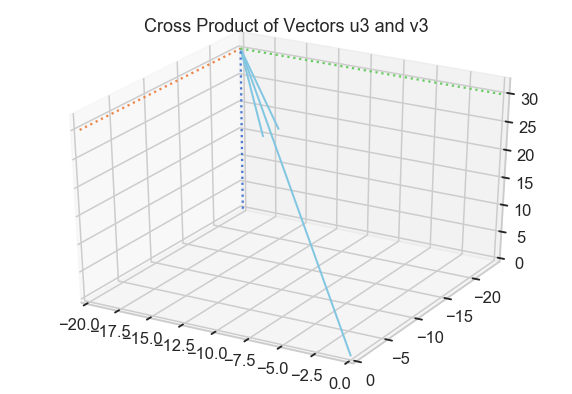

In [33]:
ax3 = plot_vector(cross, color='c')
get_xy_axes(cross)
get_z_axis(ax3, cross)
plt.title('Cross Product of Vectors u3 and v3')
plt.show()

#### Scalar Triple Product
The volume of a parallelepiped can be found using the formula $|a\cdot (b\times c)|$, or the Scalar Triple Product. This is a combination of the dot product and the cross product. Again, it makes sense logically. The cross product of two vectors results in a vector with length equal to the area of the parallelogram with sides defined by the two vectors (demonstrated above). If the parallelepiped were a cube, this area vector would be in the same direction as the third dimension vector of the parallelepiped (orthogonal to the other two vectors). This means the dot product would result in the product of the lengths of the two vectors (area of the base times the height). When not a cube, the result is just a smaller portion of the cubic volume related by the angle between the cross product vector and vector defining the third dimension of the parallelepiped.

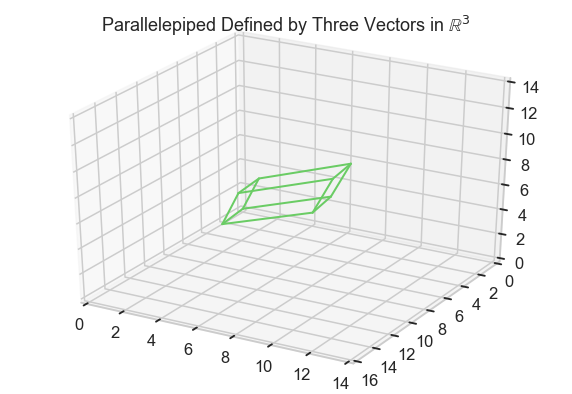

In [34]:
a,b,c = np.array([8,6,6]), np.array([2,6,2]), np.array([2,2,4])

fig = plt.figure(figsize=(10,7))
ax3 = fig.add_subplot(111, projection='3d')

ax3.plot(*zip([0,0,0],a), linewidth=2, color='g')
ax3.plot(*zip([0,0,0],b), linewidth=2, color='g')
ax3.plot(*zip([0,0,0],c), linewidth=2, color='g')
ax3.plot(*zip(a,a+b), linewidth=2, color='g')
ax3.plot(*zip(a,a+c), linewidth=2, color='g')
ax3.plot(*zip(b,b+a), linewidth=2, color='g')
ax3.plot(*zip(b,b+c), linewidth=2, color='g')
ax3.plot(*zip(c,c+a), linewidth=2, color='g')
ax3.plot(*zip(c,c+b), linewidth=2, color='g')
ax3.plot(*zip(a+b,a+b+c), linewidth=2, color='g')
ax3.plot(*zip(b+c,a+b+c), linewidth=2, color='g')
ax3.plot(*zip(a+c,a+b+c), linewidth=2, color='g')
get_xy_axes(a,b,c,a+b,a+c,b+c,a+b+c)
get_z_axis(ax3,a,b,c,a+b,a+c,b+c,a+b+c)
plt.title('Parallelepiped Defined by Three Vectors in $\mathbb{R}^3$')
plt.show()

In [35]:
print(f'Volume and STP = {abs(a @ np.cross(b,c))}')

Volume and STP = 88


# A Search for Better Plots
Matplotlib is great for quick plots in exploratory data analysis, but it doesn't look great for professional figures in many cases. Seaborn helps in some areas, but there are stil cases where the plots look unprofessional. Luckily, there are other libraries that clean up the plots a little. Two of note are Bokeh and Plotly. Both offer interactive plots for web applications, which is a plus, and both provide arguably better looking plots than matplotlib in many cases.

Because the plots that look the worst above are the 3D plots, I decided to go with Plotly, as it offers more 3D functionality.

Plotly allows a great deal of customization, but it can be a little verbose. I decided to just plot a simple vector and the parallelepiped from the last example. Both are shown below.

Plotly also offers a great export to png button in its interactive plot menu.

In [36]:
import plotly
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

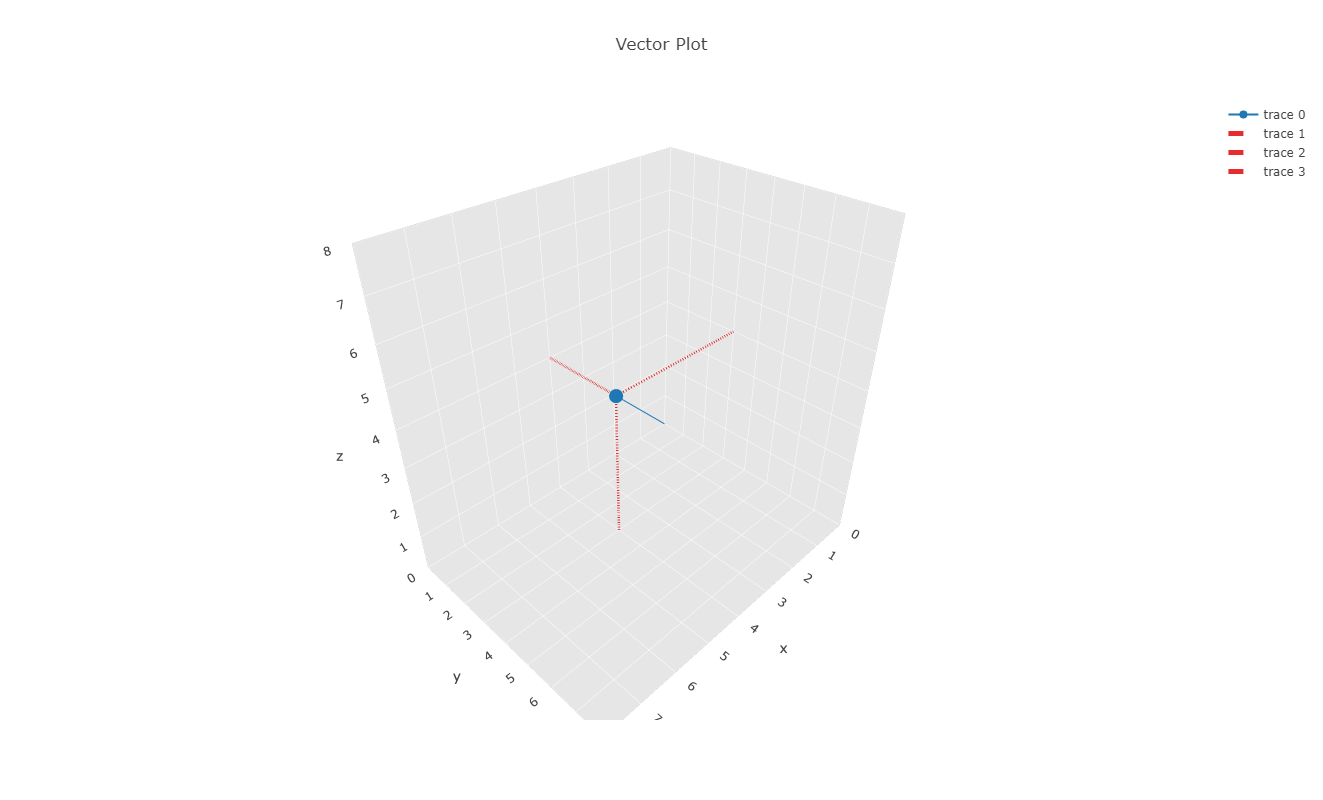

In [37]:
x = 4
y = 3
z = 4

vector = go.Scatter3d(x=(0,x), y=(0,y), z=(0,z))
loc_x = go.Scatter3d(x=(0,x), y=(y,y), z=(z,z),
                     mode='lines',
                     line=dict(
                         color='rgb(230,44,44)',
                         dash='dash',
                         width=5))
loc_y = go.Scatter3d(x=(x,x), y=(0,y), z=(z,z),
                     mode='lines',
                     line=dict(
                         color='rgb(230,44,44)',
                         dash='dash',
                         width=5))
loc_z = go.Scatter3d(x=(x,x), y=(y,y), z=(0,z),
                     mode='lines',
                     line=dict(
                         color='rgb(230,44,44)',
                         dash='dash',
                         width=5))

data =[vector, loc_x, loc_y, loc_z]
axis_range=[0,8]
axis_ticks=max(axis_range)-min(axis_range)+1

layout = go.Layout(
    width=800,
    height=800,
    autosize=False,
    title='Vector Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        ),
        yaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        ),
        zaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        )
    )
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='simplevector.html')
pyo.iplot(fig)

In [38]:
def get_combination_sums(collection):
    """Useless function for this notebook
    
    I thought I'd use this, but now I don't need it.
    Still kind of a nifty function for reference.
    """
    combination_sums = []
    for length in range(1, len(collection)+1):
        for combination in itertools.combinations(collection, length):
            print(combination)
            combination_sums.append(sum(combination))
    return combination_sums

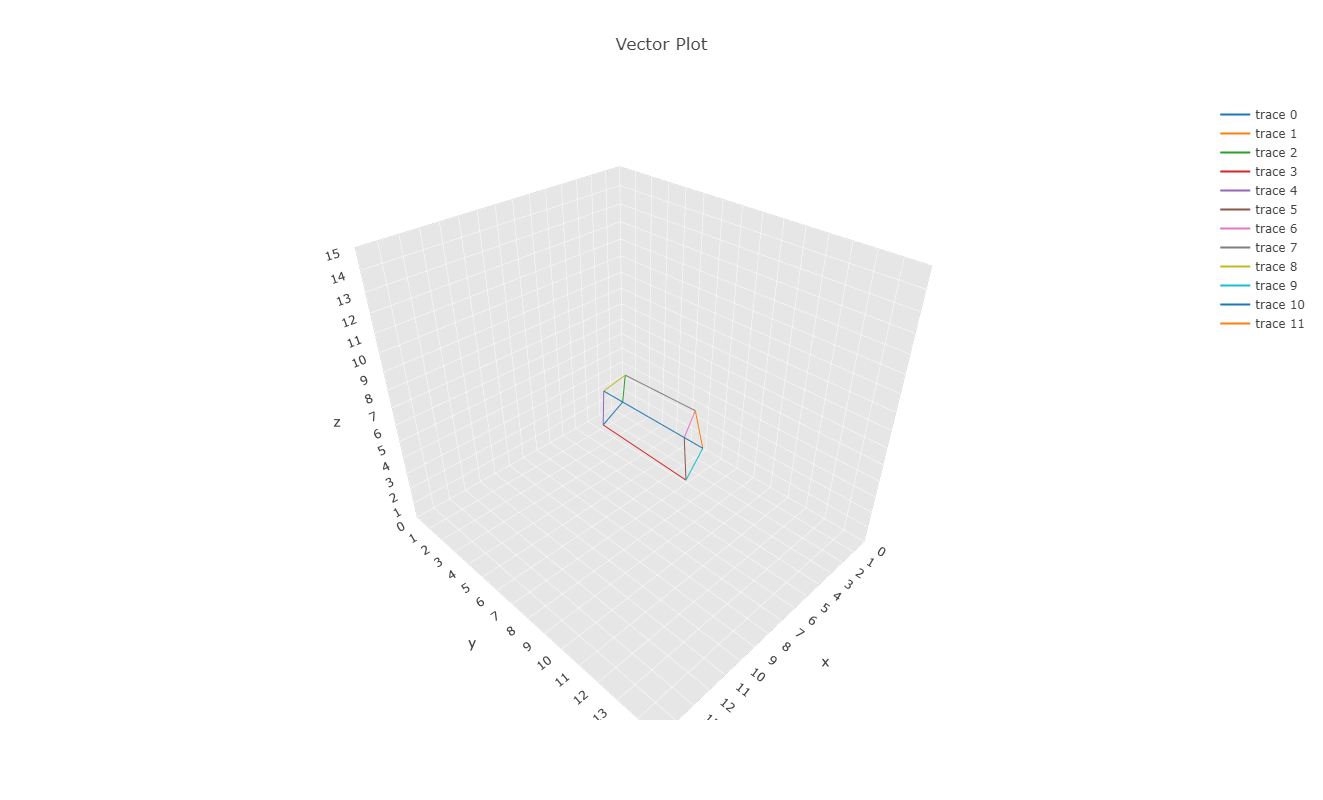

In [39]:
data = [
    go.Scatter3d(
        x=(0,a[0]),
        y=(0,a[1]),
        z=(0,a[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(0,b[0]),
        y=(0,b[1]),
        z=(0,b[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(0,c[0]),
        y=(0,c[1]),
        z=(0,c[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(a[0],a[0]+b[0]),
        y=(a[1],a[1]+b[1]),
        z=(a[2],a[2]+b[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(a[0],a[0]+c[0]),
        y=(a[1],a[1]+c[1]),
        z=(a[2],a[2]+c[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(b[0],b[0]+a[0]),
        y=(b[1],b[1]+a[1]),
        z=(b[2],b[2]+a[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(b[0],b[0]+c[0]),
        y=(b[1],b[1]+c[1]),
        z=(b[2],b[2]+c[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(c[0],c[0]+b[0]),
        y=(c[1],c[1]+b[1]),
        z=(c[2],c[2]+b[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(c[0],c[0]+a[0]),
        y=(c[1],c[1]+a[1]),
        z=(c[2],c[2]+a[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(a[0]+b[0],a[0]+b[0]+c[0]),
        y=(a[1]+b[1],a[1]+b[1]+c[1]),
        z=(a[2]+b[2],a[2]+b[2]+c[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(a[0]+c[0],a[0]+b[0]+c[0]),
        y=(a[1]+c[1],a[1]+b[1]+c[1]),
        z=(a[2]+c[2],a[2]+b[2]+c[2]),
        mode='lines'
    ),
    go.Scatter3d(
        x=(b[0]+c[0],a[0]+b[0]+c[0]),
        y=(b[1]+c[1],a[1]+b[1]+c[1]),
        z=(b[2]+c[2],a[2]+b[2]+c[2]),
        mode='lines'),
]

axis_range=[0,15]
axis_ticks=max(axis_range)-min(axis_range)+1

layout = go.Layout(
    width=800,
    height=800,
    autosize=False,
    title='Vector Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        ),
        yaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        ),
        zaxis=dict(
            gridcolor='rgb(255,255,255)',
            zerolinecolor='rgb(255,255,255)',
            showbackground=True,
            backgroundcolor='rgb(230,230,230)',
            nticks=axis_ticks,
            range=axis_range
        )
    )
)

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='parallelepiped.html')
pyo.iplot(fig)